***
# Video Game Sales Analysis: Trends, Platforms, and Insights
## Introduction:
This project aims to provide a comprehensive analysis of video game sales and user ratings, leveraging historical data to uncover trends, patterns, and insights that can guide strategic decision-making in the gaming industry.

### Methodology
To analyze industry trends, this project follows a structured data science approach:

- Data Collection: The dataset includes information on sales, platforms, release years, genres, user and critic scores, and ESRB ratings.
- Data Preparation:
    - Standardized column names and data types.
    - Handled missing values.
    - Calculated total sales across global regions.
- Exploratory Data Analysis (EDA): Visualized sales trends, platform performance, and genre popularity.
- Hypothesis Testing: Examined differences in user ratings across platforms and genres.
- User Profile Analysis: Investigated regional preferences and ESRB rating impacts.

### Scope
This analysis focuses on historical video game sales trends to extract insights that can shape industry strategies. Specifically, it examines:

- Game release patterns over time.
- Sales performance across platforms and genres.
- Regional market trends and consumer preferences.
- User rating comparisons to determine significant differences.
- Insights for game publishers to optimize marketing and development decisions.

### Significance
Understanding the dynamics of the gaming market is essential for several reasons:

- Guide business strategy: Identify top-performing platforms and genres for investment.
- Refine marketing efforts: Adapt campaigns based on regional user preferences.
- Enhance game quality: Recognize the impact of critic and user reviews on sales.
- Predict future trends: Use historical data to make informed decisions in the gaming industry.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

# Load the dataset
file_path = '/datasets/games.csv'  
games_df = pd.read_csv(file_path)

# Display the first few rows
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***
## Preparing The Data
Before analysis, the dataset needs cleaning to fix missing values, format inconsistencies, and ensure accuracy. This step standardizes key fields, making the data ready for meaningful insights.

In [2]:
# Replace column names with lowercase
games_df.columns = games_df.columns.str.lower()

# Convert 'year_of_release' to integers filling missing values with 0
games_df['year_of_release'] = games_df['year_of_release'].fillna(0).astype(int)

# Replace 'tbd' with NaN and convert 'user_score' to numeric
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

# Convert 'critic_score' to numeric
games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors='coerce')

# Keep rows where at least one of the scores critic or user is present
games_df = games_df.dropna(subset=['critic_score', 'user_score'], how='all')

# Check for duplicates 
duplicates = games_df.duplicated(subset=['name', 'year_of_release', 'platform'])
print(f"Number of duplicates: {duplicates.sum()}")

# Display duplicates if any exist
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(games_df[duplicates])

# Calculate total sales for each game
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display first few rows to verify changes
games_df.head()

Number of duplicates: 1
Duplicate rows:
                name platform  year_of_release   genre  na_sales  eu_sales  \
16230  Madden NFL 13      PS3             2012  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
16230       0.0          0.0          83.0         5.5      E  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


#### Observations: 
**Data Cleaning & Processing:**
- Standardized `year_of_release` as an integer, filling missing values with `0` to maintain numerical integrity.
- Converted `user_score` and `critic_score` to numeric, replacing ‘TBD’ with `NaN` for accuracy.
- Kept games with at least one valid review score to preserve meaningful data.
- Calculated `total_sales` by summing sales from all regions (NA, EU, JP, and Others).

**Data Validation:**
- Ensured all `user_score` values are numeric after conversion.
- Identified and removed duplicate game entries while ensuring valid data is retained.

**Next Steps:**
- EDA: Examine trends in game releases, platform sales, and genre performance.
- Regional Analysis: Identify market differences across NA, EU, and JP.
- Deeper Exploration: Investigate relationships between review scores, sales performance, and platform success.

***
## Analyzing The Data: Exploratory Data Analysis (EDA)
### Look at the Number of Games Released in Different Years:

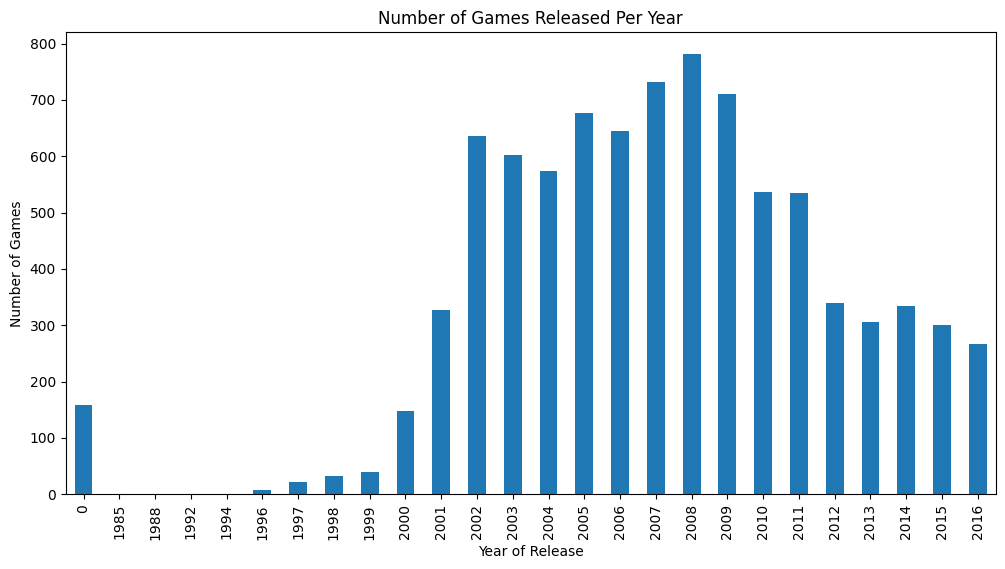

In [3]:
# Count the number of games released each year
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Plot the number of games released per year
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

#### Observations:
- Game releases remained low for most years until the early 2000s.
- The industry experienced rapid growth, peaking around 2008 before declining in subsequent years.

### Sales Variation by Platform:

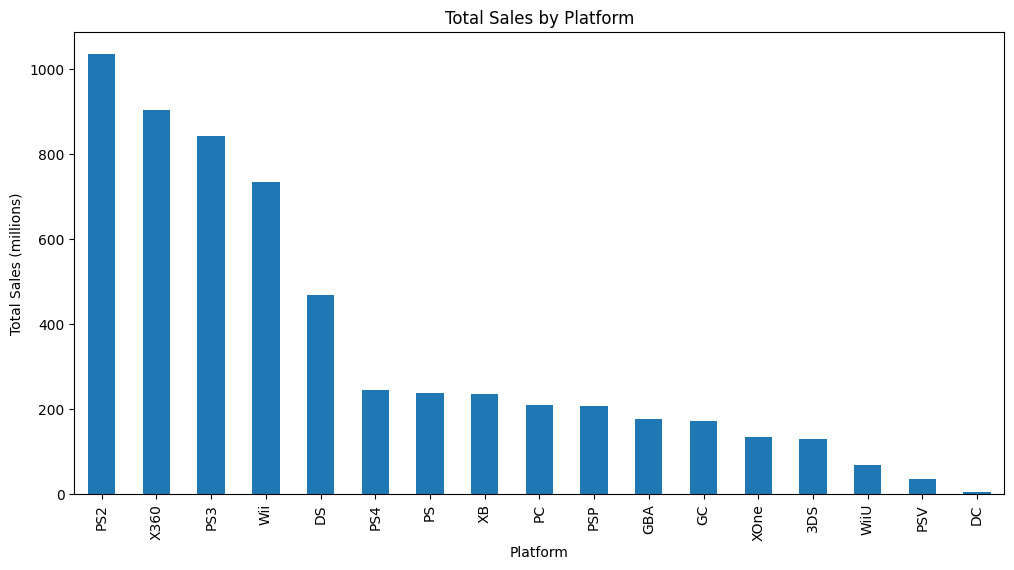

<Figure size 1400x800 with 0 Axes>

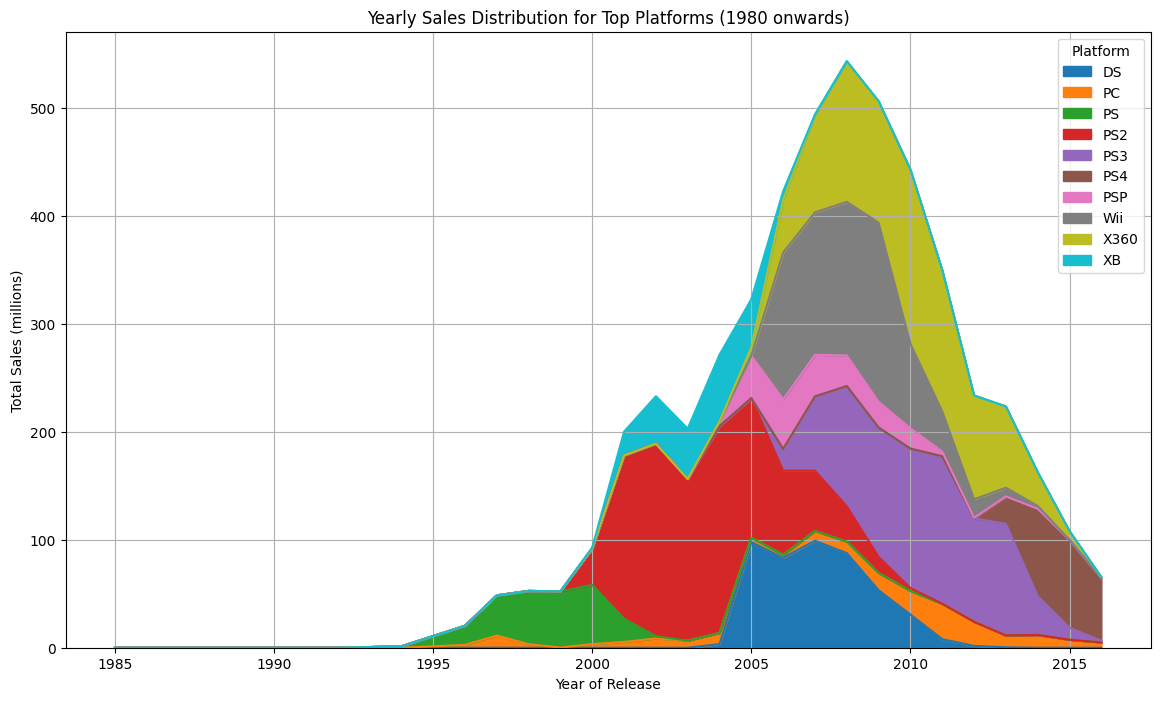

In [4]:
# Calculate total sales by platform
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plot total sales by platform
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

# Find the top platforms with greatest total sales
top_platforms = platform_sales.head(10).index

# Filter the dataset to include only years from 1980 onwards
filtered_games_df = games_df[games_df['year_of_release'] >= 1980]

# Distribution of sales for each year for the top platforms
platform_yearly_sales = filtered_games_df[filtered_games_df['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Plot the distribution as an area chart
plt.figure(figsize=(14, 8))
platform_yearly_sales.plot(kind='area', stacked=True, figsize=(14, 8))
plt.title('Yearly Sales Distribution for Top Platforms (1980 onwards)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

#### Observations:
- Top-Selling Platforms: The PS2 dominates total sales, followed by X360, PS3, Wii, and DS, each exceeding 600 million units sold.
- Sustained Market Presence: Platforms like PS2, PS3, and X360 had longer sales peaks, maintaining relevance for years.
- Sales Peaks & Decline: Industry-wide sales peaked around 2008-2009. A sharp decline post-2010 suggests the transition to newer platforms (PS4, XOne) and a shift towards digital distribution.
- Generational Trends: New console generations drive spikes in sales, but their relevance fades as newer technology emerges.

### Identifying Relevant Period:

<Figure size 1400x800 with 0 Axes>

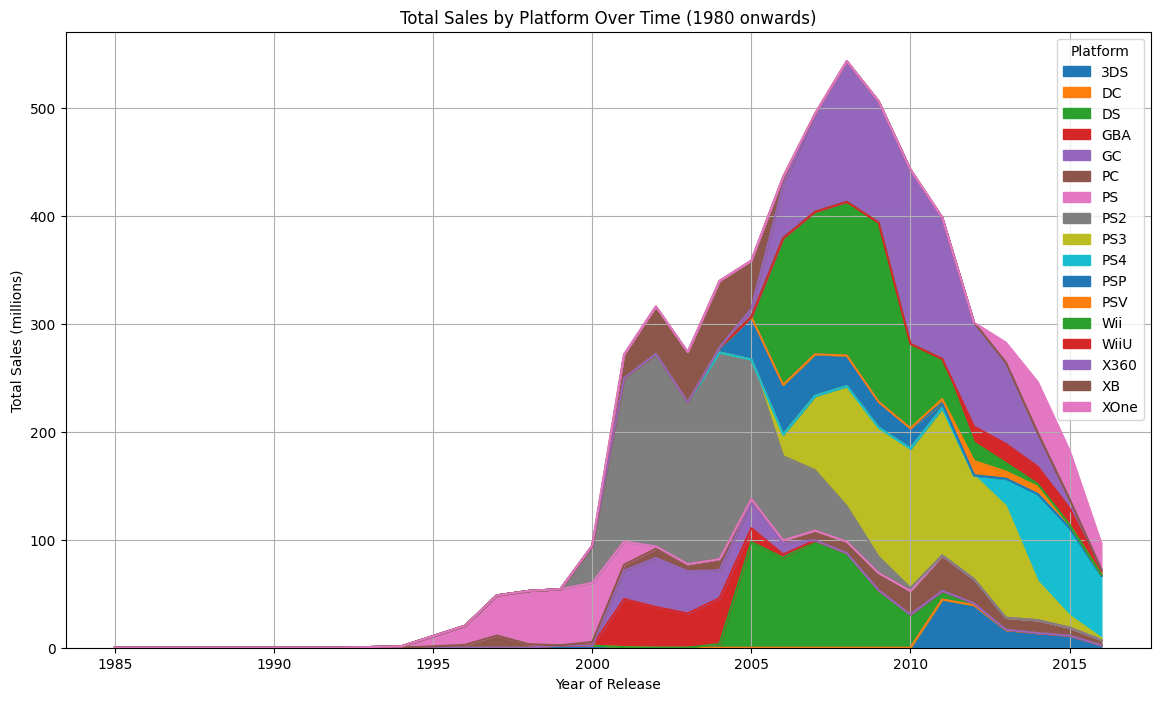

In [5]:
# Filter the dataset to include only years from 1980 onwards
filtered_games_df = games_df[games_df['year_of_release'] >= 1980]

# Aggregate total sales per platform per year
platform_sales_per_year = filtered_games_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Plot area chart to show total sales for each platform over time
plt.figure(figsize=(14, 8))
platform_sales_per_year.plot(kind='area', stacked=True, figsize=(14, 8))
plt.title('Total Sales by Platform Over Time (1980 onwards)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

#### Observations:
- Peak Sales Period: The industry experienced rapid growth from the mid-1990s, peaking around 2008-2009, before a significant decline.
- Platform Lifecycle: Platforms like PS2, X360, and PS3 had sustained sales over their lifespans, making them critical for past trends.
- Post-2010 Decline: Sales dropped sharply after 2010, aligning with the rise of digital distribution and next-gen consoles.
- **Choosing a Relevant Period**: Given the decline of older platforms and market shifts, focusing on the last 10 years of data (or a reasonable timeframe) ensures relevance for modern gaming trends.

### Focus on Relevant Data for Building a Model for 2017, And Select Potentially Profitable Platforms:

<Figure size 1400x800 with 0 Axes>

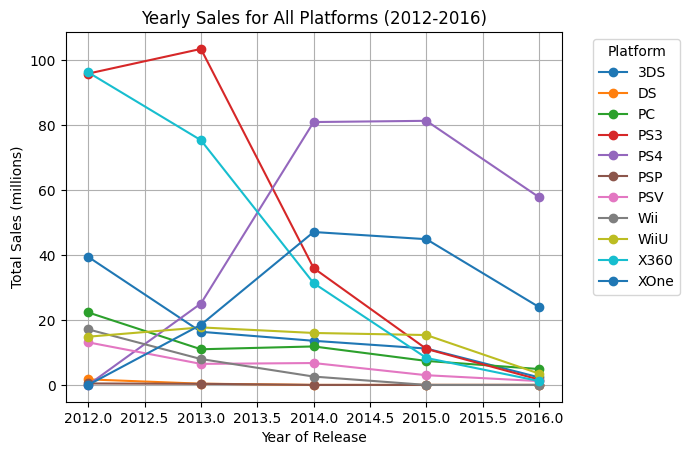

Sales over time for each platform (2012-2016):
platform           3DS    DS     PC     PS3    PS4   PSP    PSV    Wii   WiiU  \
year_of_release                                                                 
2012             39.43  1.71  22.32   95.87   0.00  0.45  13.11  17.11  14.85   
2013             16.36  0.38  10.98  103.47  25.07  0.34   6.48   7.97  17.71   
2014             13.59  0.00  11.85   35.97  80.95  0.00   6.74   2.57  16.00   
2015             11.20  0.00   7.39   11.09  81.33  0.00   2.99   0.00  15.36   
2016              2.32  0.00   4.89    1.63  57.79  0.00   1.18   0.00   3.48   

platform          X360   XOne  
year_of_release                
2012             96.25   0.00  
2013             75.36  18.52  
2014             31.34  47.09  
2015              8.31  44.88  
2016              1.19  23.96  


In [6]:
# Ensure all column names are in lowercase
games_df.columns = games_df.columns.str.lower()

# Filter the data to include years from 2012 to 2016
recent_games_df = games_df[(games_df['year_of_release'] >= 2012) & (games_df['year_of_release'] <= 2016)]

# Pivot table for total sales by year and platform
pivot_table = recent_games_df.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)

# Plot the sales over time for each platform
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='line', stacked=False, marker='o')
plt.title('Yearly Sales for All Platforms (2012-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

print("Sales over time for each platform (2012-2016):")
print(pivot_table)

#### Observations:
- PS4 dominates the market, showing strong and consistent growth from 2013-2016, making it a key platform for 2017.
- Xbox One sales steadily increased since its 2013 launch, indicating strong adoption and potential for further growth.
- 3DS remains competitive, showing solid sales alongside home consoles, proving handheld gaming still has a market.
- Older platforms like PS3 and X360 are in decline, as gamers transition to newer consoles.
- Market transition evident: Sales peak around 2013, then decline as newer platforms (PS4, XOne, 3DS) take over.
- **Key Takeaway**: PS4, Xbox One, and 3DS are the most promising platforms heading into 2017 based on sustained or growing sales.

### Box Plot for Global Sales by Platform:

<Figure size 1400x800 with 0 Axes>

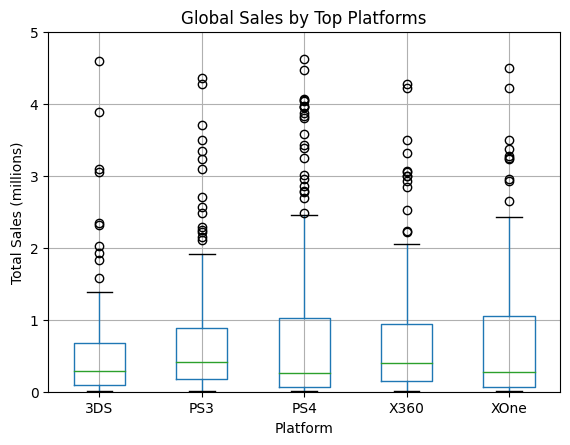

Average sales by platform:
platform
Wii     1.626471
PS4     0.942846
X360    0.904043
PS3     0.873345
XOne    0.722849
3DS     0.702542
DS      0.696667
WiiU    0.667327
PC      0.277440
PSV     0.232824
PSP     0.197500
Name: total_sales, dtype: float64


In [7]:
recent_games_df = games_df[(games_df['year_of_release'] >= 2012) & (games_df['year_of_release'] <= 2016)]

# Calculate total sales by platform for the filtered data
platform_sales_relevant = recent_games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Identify top platforms based on recent sales
profitable_platforms = platform_sales_relevant.head(5).index

# Box plot for global sales by platform 
plt.figure(figsize=(14, 8))
recent_games_df[recent_games_df['platform'].isin(profitable_platforms)].boxplot(column='total_sales', by='platform')
plt.ylim(0, 5)  
plt.title('Global Sales by Top Platforms')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

# Calculate average sales by platform
average_sales_by_platform = recent_games_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

print("Average sales by platform:")
print(average_sales_by_platform)

#### Observations:
- PS4, X360, and PS3 have the highest median sales, indicating consistently strong performance across multiple titles.
- Xbox One is competitive, with a solid presence and several high-sales outliers, reflecting growing market adoption.
- 3DS, while lower in median sales, has standout hits, reinforcing its relevance in the handheld gaming market.
- Sales variability is high across platforms, with blockbuster titles driving major sales spikes, especially on home consoles.
- **Key Takeaway**: PS4, X360, and Xbox One show strong commercial potential, making them priority platforms for 2017 predictions.

### Reviews vs. Sales for a Popular Platform (PS4):

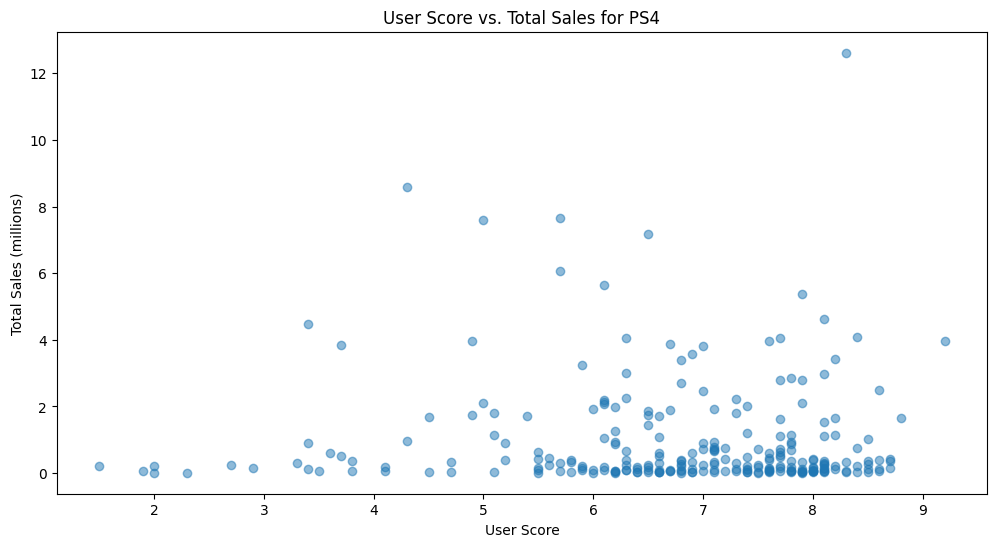

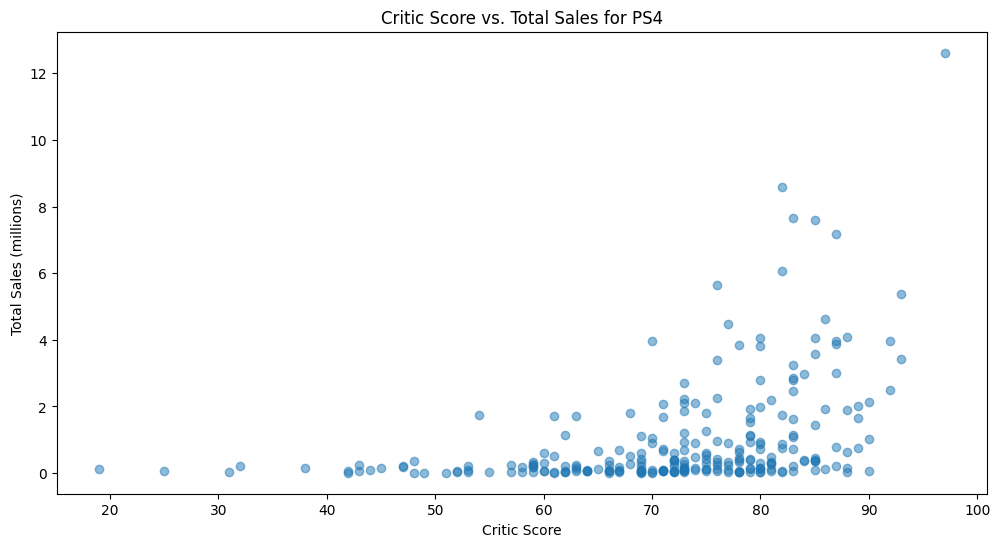

PS4: Correlation between User Score and Total Sales: -0.03
PS4: Correlation between Critic Score and Total Sales: 0.41


In [8]:
# Filter PS4 data and drop missing review scores
ps4_data = games_df[(games_df['platform'] == 'PS4')].dropna(subset=['user_score', 'critic_score'])

# Function to plot review scores vs total sales
def plot_reviews_vs_sales(df, review_col, title):
    plt.figure(figsize=(12, 6))
    plt.scatter(df[review_col], df['total_sales'], alpha=0.5)
    plt.title(title)
    plt.xlabel(review_col.replace('_', ' ').title())
    plt.ylabel('Total Sales (millions)')
    plt.show()

# Plot review scores vs. sales for PS4
plot_reviews_vs_sales(ps4_data, 'user_score', 'User Score vs. Total Sales for PS4')
plot_reviews_vs_sales(ps4_data, 'critic_score', 'Critic Score vs. Total Sales for PS4')

# Calculate correlations
ps4_user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
ps4_critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"PS4: Correlation between User Score and Total Sales: {ps4_user_corr:.2f}")
print(f"PS4: Correlation between Critic Score and Total Sales: {ps4_critic_corr:.2f}")

#### Observations:
- **User Score vs. Total Sales**: Very weak correlation (-0.03), suggesting that user ratings alone are not strong predictors of sales.
- **Critic Score vs. Total Sales**: Moderate positive correlation (0.41), indicating that higher critic scores tend to align with better sales.
- Outliers: Several high-selling games exist across all rating ranges, meaning external factors (marketing, franchise popularity) likely play a role.

### Comparing Sales of the Same Games on Other Platforms:

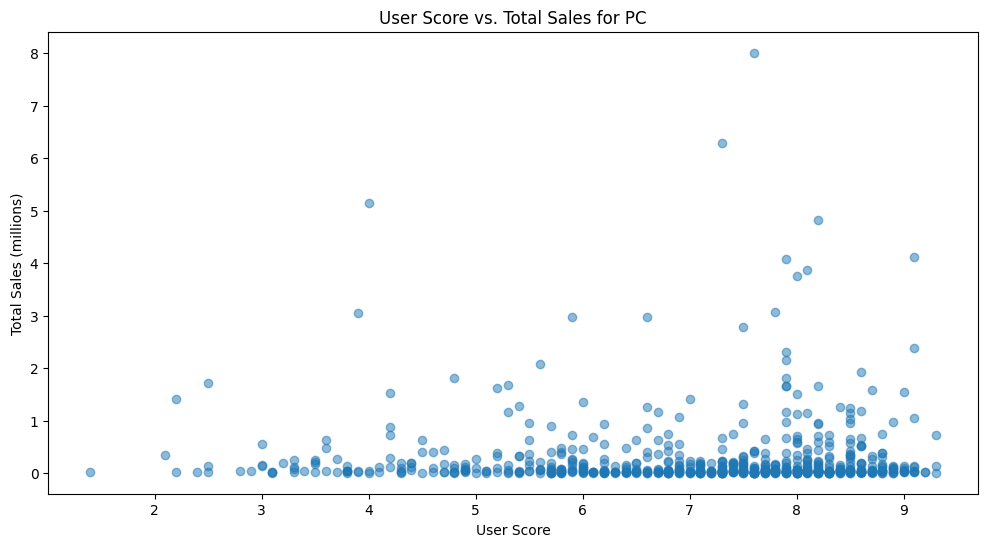

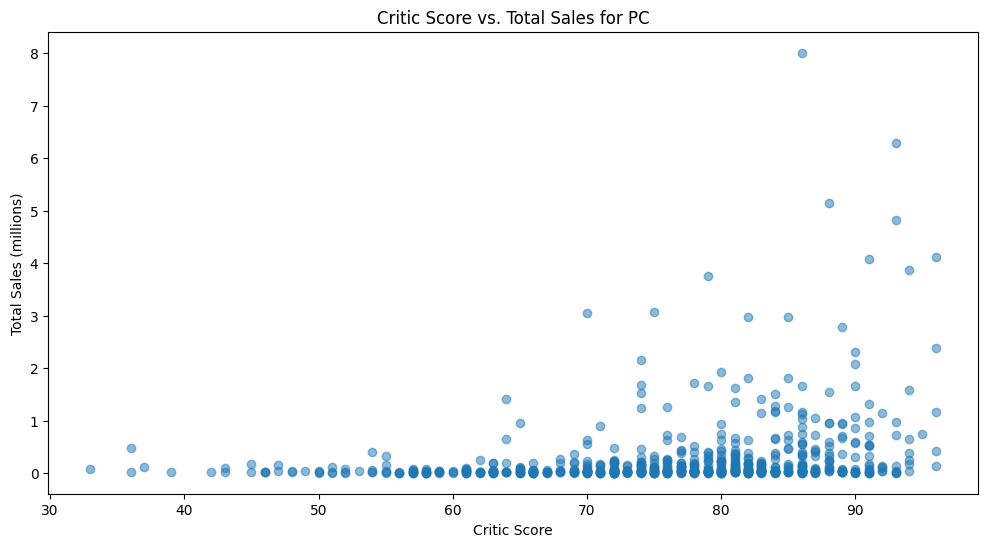

PC: Correlation between User Score and Total Sales: 0.00
PC: Correlation between Critic Score and Total Sales: 0.26


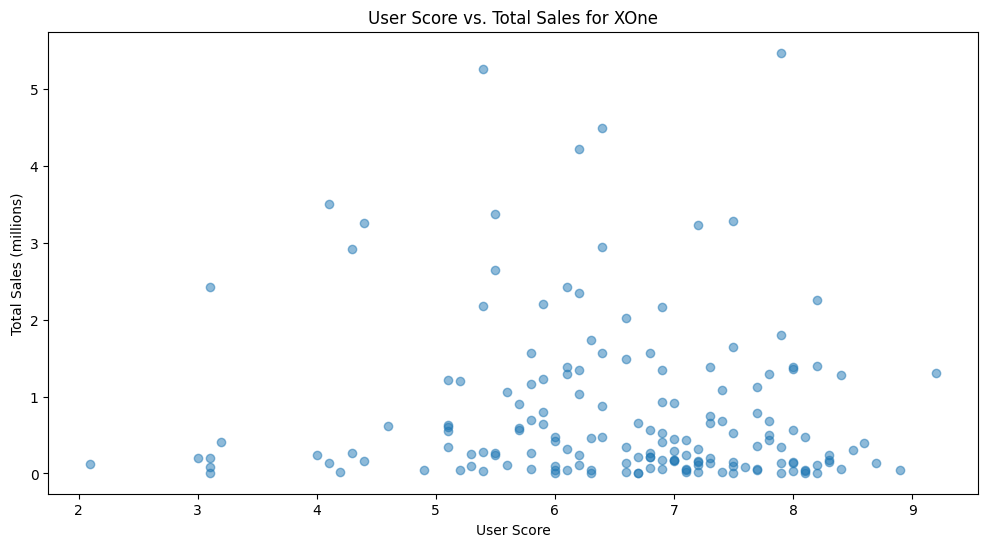

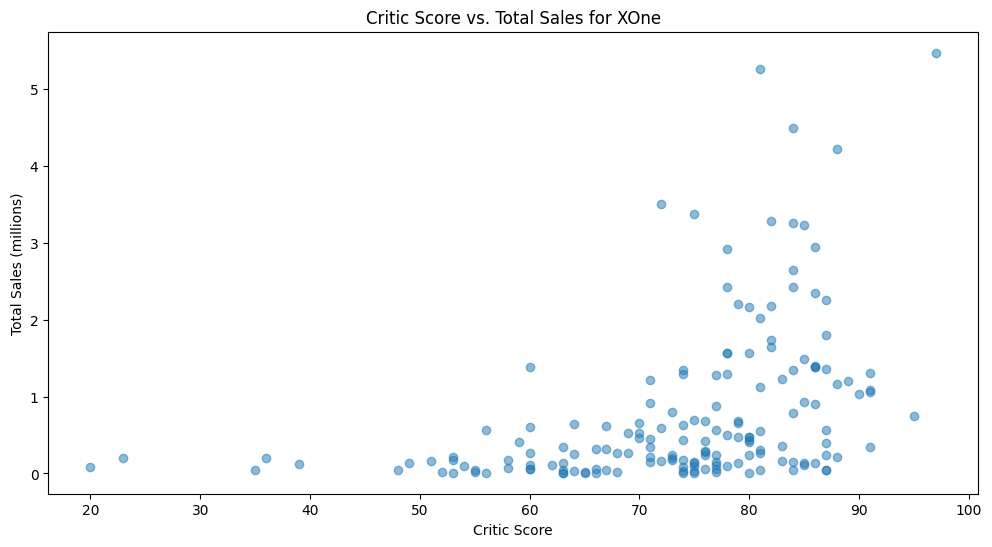

XOne: Correlation between User Score and Total Sales: -0.09
XOne: Correlation between Critic Score and Total Sales: 0.41


In [9]:
# Function to analyze reviews vs sales for multiple platforms
def analyze_reviews_vs_sales(platform):
    platform_data = games_df[(games_df['platform'] == platform)].dropna(subset=['user_score', 'critic_score'])

    # Plot review scores vs. sales
    plot_reviews_vs_sales(platform_data, 'user_score', f'User Score vs. Total Sales for {platform}')
    plot_reviews_vs_sales(platform_data, 'critic_score', f'Critic Score vs. Total Sales for {platform}')

    # Calculate correlations
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

    print(f"{platform}: Correlation between User Score and Total Sales: {user_corr:.2f}")
    print(f"{platform}: Correlation between Critic Score and Total Sales: {critic_corr:.2f}")

# Run analysis for PC & Xbox One
analyze_reviews_vs_sales('PC')
analyze_reviews_vs_sales('XOne')

### Combining Critic & User Score Data

In [10]:
# Select relevant columns for critic and user scores
critic_scores_df = games_df[['name', 'platform', 'year_of_release', 'total_sales', 'critic_score']].copy()
user_scores_df = games_df[['name', 'platform', 'year_of_release', 'total_sales', 'user_score']].copy()

# Keep all rows and merge on common columns
merged_scores_df = pd.merge(critic_scores_df, user_scores_df, 
                            on=['name', 'platform', 'year_of_release', 'total_sales'], 
                            how='outer')

# Display first few rows to verify results
merged_scores_df.head()

,name,platform,year_of_release,total_sales,critic_score,user_score
0,Wii Sports,Wii,2006,82.54,76.0,8.0
1,Mario Kart Wii,Wii,2008,35.52,82.0,8.3
2,Wii Sports Resort,Wii,2009,32.77,80.0,8.0
3,New Super Mario Bros.,DS,2006,29.80,89.0,8.5
4,Wii Play,Wii,2006,28.91,58.0,6.6


### Merging Critic & User Scores
- Merged review scores while **keeping all games**, even if only one score is available.
- **Missing values remain as NaN** to avoid data loss.
- Ensures more accurate analysis of review impact on sales.

In [11]:
# Summary function for correlation comparison
def summarize_correlations():
    platforms = ['PS4', 'XOne', 'PC']
    correlations = {
        'Platform': [],
        'User Score Correlation': [],
        'Critic Score Correlation': []
    }
    
    for platform in platforms:
        platform_data = recent_games_df[(recent_games_df['platform'] == platform) & 
                                        (recent_games_df['user_score'].notna()) & 
                                        (recent_games_df['critic_score'].notna())]
        if not platform_data.empty:
            user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
            critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
            correlations['Platform'].append(platform)
            correlations['User Score Correlation'].append(user_corr)
            correlations['Critic Score Correlation'].append(critic_corr)
    
    summary_df = pd.DataFrame(correlations)
    print(summary_df)

# Print summary to compare 
summarize_correlations()

  Platform  User Score Correlation  Critic Score Correlation
0      PS4               -0.033625                  0.405895
1     XOne               -0.094003                  0.410422
2       PC               -0.136934                  0.236008


#### Observations:
- **Critic Scores:** Stronger correlation with total sales across platforms, indicating critic reviews influence purchasing decisions.
- **User Scores:** Weak or negative correlation, suggesting that user ratings have limited impact on sales.
- **Platform-Specific Trends:** 
    - PS4 & Xbox One: Similar correlation patterns (critics influence sales more than users).
    - PC: Lower correlation overall, possibly due to different market factors (e.g., digital distribution, niche games).

### Distribution of Games by Genre:
To understand which genres are most profitable, we analyze total sales and variability across genres.

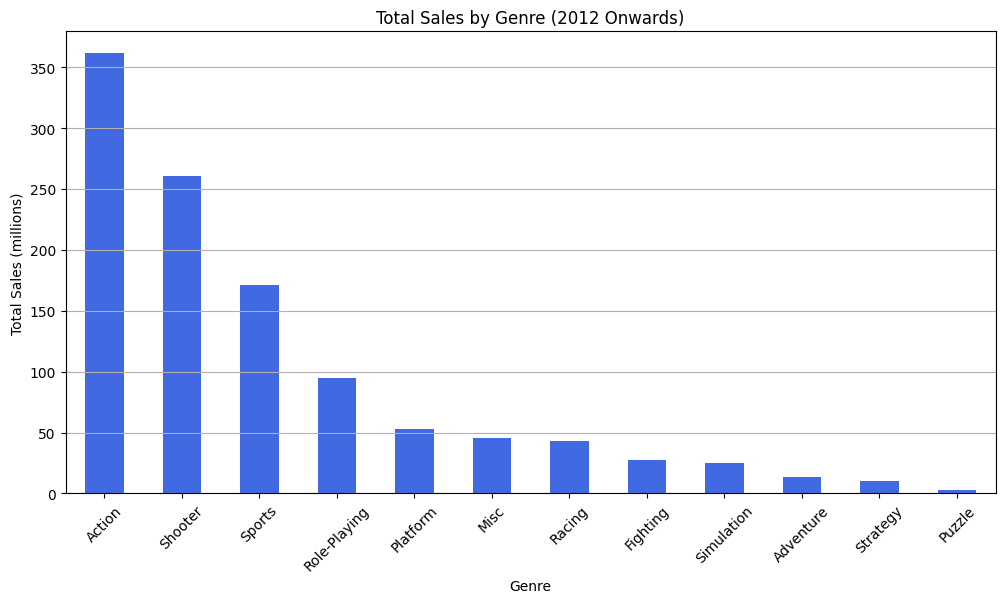

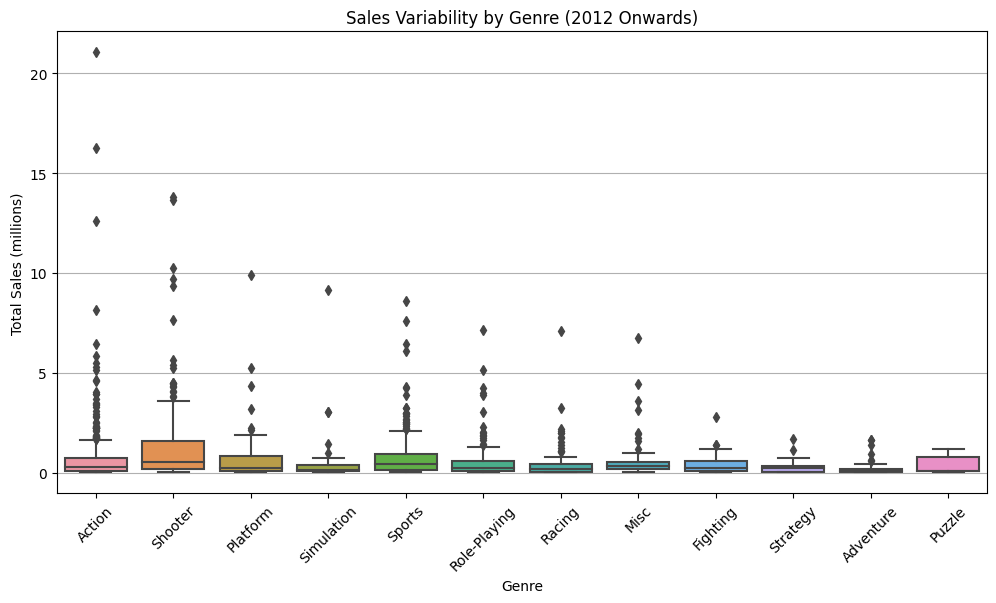

In [12]:
# Ensure lowercase column names
games_df.columns = games_df.columns.str.lower()

# Calculate total sales if missing
if 'total_sales' not in games_df.columns:
    games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filter data for recent years
recent_games_df = games_df[games_df['year_of_release'] >= 2012]

# Calculate total sales by genre
genre_sales = recent_games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot total sales by genre
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='royalblue')
plt.title('Total Sales by Genre (2012 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Box plot for variability in sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=recent_games_df, x='genre', y='total_sales')
plt.title('Sales Variability by Genre (2012 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Observations:
**Sales by Genre (2012 Onwards)**
- Top-Selling Genres: Action, Shooter, and Sports dominate total sales, indicating their widespread popularity.
- Steady Performers: Role-Playing and Platform games also show strong sales, though at a lower level than top genres.
- Niche Markets: Puzzle and Strategy games have the lowest sales, suggesting a more specialized audience.

**Median Sales by Genre (2012 Onwards)**
- Shooter Games Lead: Shooter games not only have high total sales but also the highest median sales, meaning most shooter titles perform well.
- Consistently Performing Genres: Sports, Role-Playing, and Platform genres maintain relatively high median sales, indicating steady demand.

**Sales Variability (Box Plot)**
- Outliers in Top Genres: Shooter, Action, and Sports games have significant outliers, meaning certain titles greatly outperformed the genre’s average.
- Lower Variability in Some Genres: Strategy and Puzzle genres have fewer outliers, indicating more consistent (but lower) sales.

***
## Conclusions of Data Analysis From Graphs:
**Game Release Trends**
- Observation: The number of game releases fluctuates yearly, with notable peaks in certain years.
- Insight: Industry trends, technological advancements, and console generations influence release patterns.

**Sales by Platform**
- Observation: Platforms like PS4, Xbox One, and Wii have the highest total sales.
- Insight: Popular platforms attract larger user bases, but sales shift as new hardware replaces older systems.

**Selecting a Relevant Period**
- Observation: Data from 2012 onwards captures recent trends in gaming.
- Insight: This period is most relevant for predicting future sales patterns in 2017.

**Leading & Profitable Platforms**
- Observation: PS4 and Xbox One have strong recent sales, while Wii has declined.
- Insight: These platforms represent the best investment opportunities for 2017.

**Sales Variability Across Platforms**
- Observation: Some platforms (PS4, Xbox One) show high variability in sales.
- Insight: While these platforms can produce high-selling games, the risk of lower sales exists.

**Review Scores & Sales Correlation**
- Observation: Critic scores show a positive correlation with sales, while user scores have a weaker impact.
- Insight: High critic ratings can influence purchasing decisions more than user ratings.

**Sales Comparison Across Platforms**
- Observation: Games released on multiple platforms often sell better on PS4 and Xbox One.
- Insight: Platform-specific factors (user base, exclusive content) significantly impact sales.

**Genre Performance**
- Observation: Action, Shooter, and Sports games generate the highest revenue.
- Insight: These genres have broad appeal and are likely to remain profitable.

### Summary of Findings
- Time Frame: Data from 2012 onward is most relevant for predicting 2017 sales.
- Top Platforms: PS4, Xbox One, and 3DS show strong market performance.
- Review Impact: Critic reviews influence sales more than user reviews.
- Profitable Genres: Shooter, Action, and Sports games generate the highest revenue.

### Recommendations
- Target the Right Platforms: Focus on game development for PS4, Xbox One, and 3DS.
- Prioritize Quality: Aim for high critic scores to maximize sales impact.
- Invest in Top Genres: Concentrate on Action, Shooter, and Sports genres.
- Adapt to Market Trends: Monitor emerging platforms and evolving genre preferences to stay competitive.

***
## Create a User Profile for Each Region:
Analyzing the data to determine the top five platforms, genres, and the impact of ESRB ratings on sales for each region (NA, EU, JP).

### Top Five Platforms in Each Region:

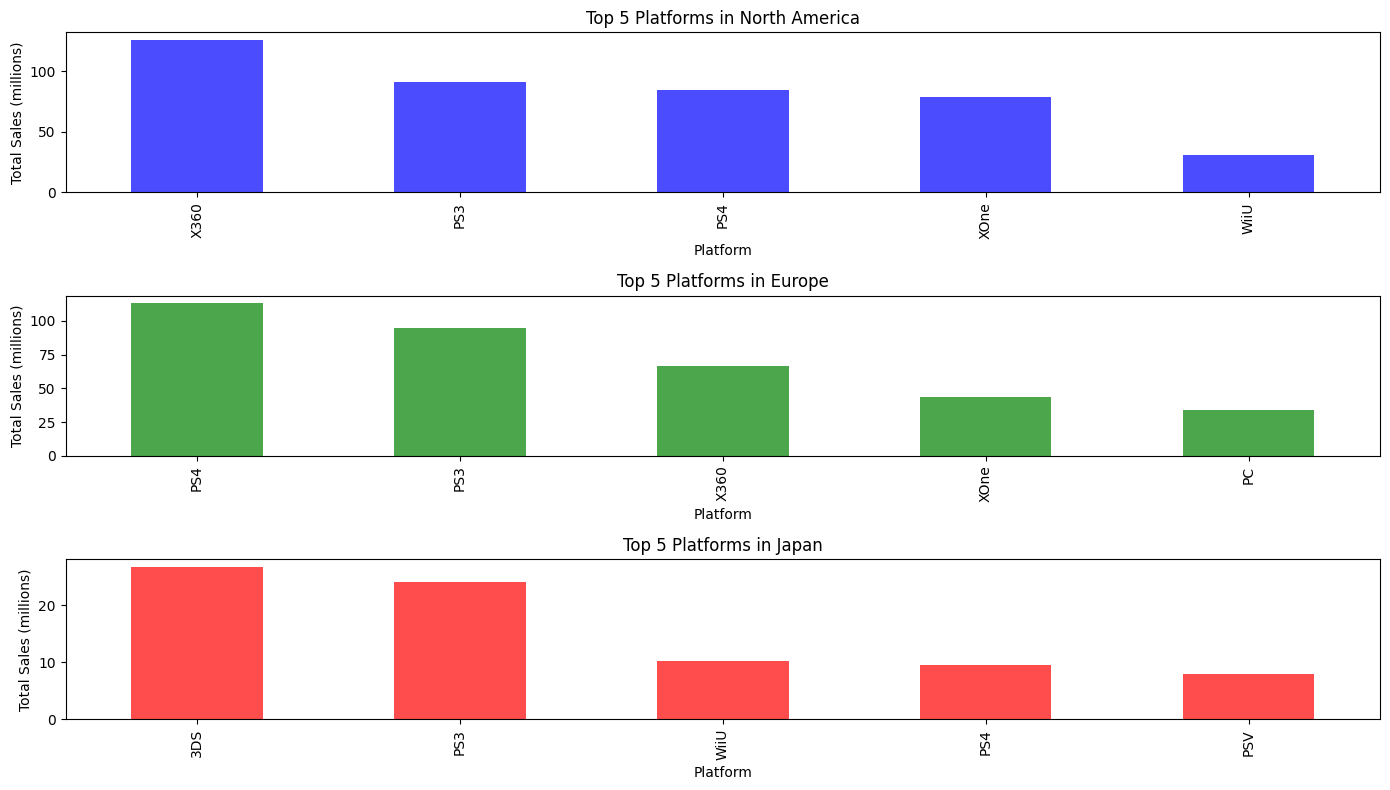

In [13]:
# Calculate top five platforms by sales for each region
top_platforms_na = recent_games_df.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = recent_games_df.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = recent_games_df.groupby('platform')['jp_sales'].sum().nlargest(5)

# Plot the top five platforms for each region
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
top_platforms_na.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 5 Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.subplot(3, 1, 2)
top_platforms_eu.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 5 Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.subplot(3, 1, 3)
top_platforms_jp.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 5 Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

#### Observations
**North America:**
- **Top Platforms:** Xbox 360, PS4, PS3, Xbox One, 3DS.  
- **Insight:** North America favors platforms known for high-performance gaming and large game libraries, with a strong presence of Microsoft and Sony consoles.

**Europe:**
- **Top Platforms:** PS4, PS3, X360, XOne, 3DS.  
- **Insight:** The European market closely follows North America but leans slightly more toward PlayStation platforms.

**Japan:**
- **Top Platforms:** 3DS, PS3, PSV, PS4, WiiU.  
- **Insight:** Japan favors handheld consoles and PlayStation systems, reflecting strong mobile gaming trends and regional preferences.

### Top Five Genres in Each Region:

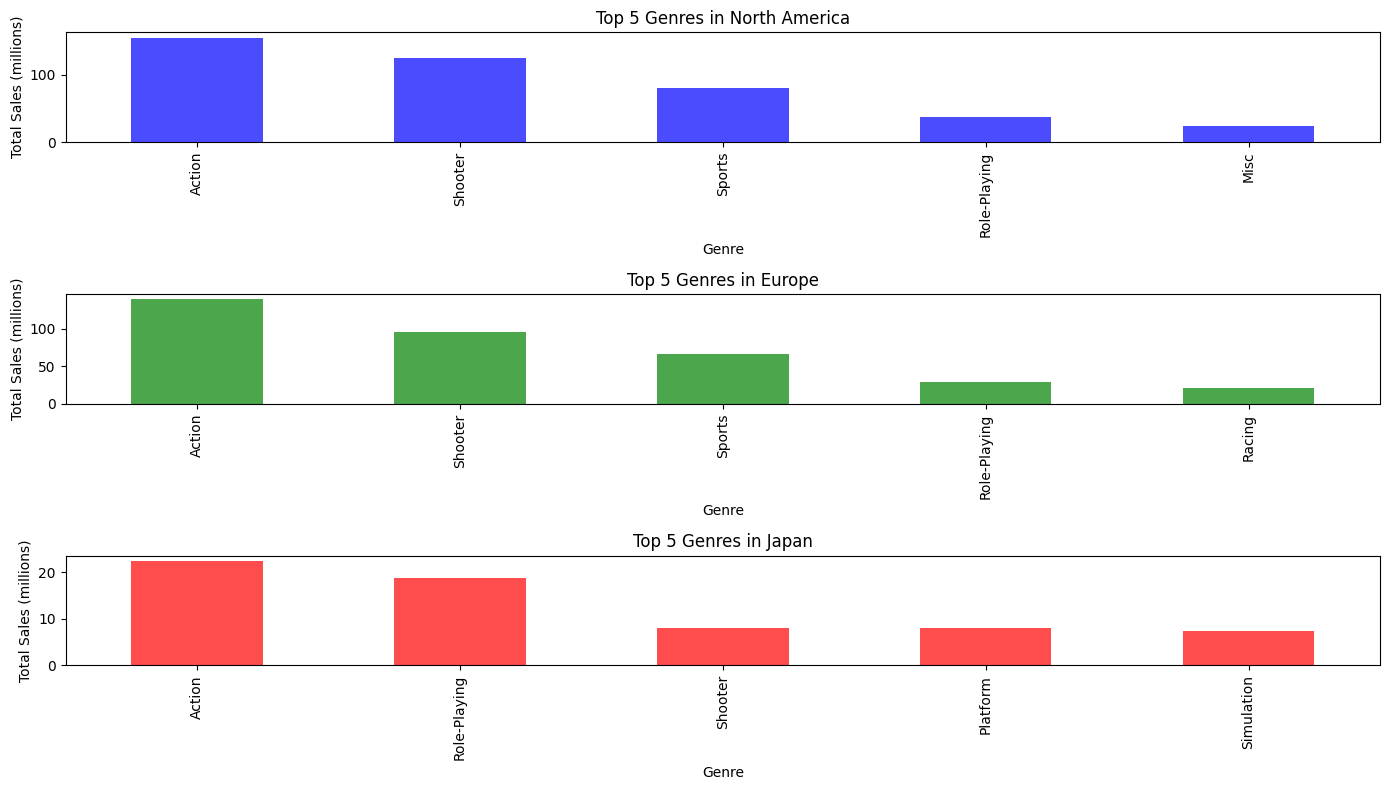

In [14]:
# Calculate top five genres by sales for each region
top_genres_na = recent_games_df.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = recent_games_df.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = recent_games_df.groupby('genre')['jp_sales'].sum().nlargest(5)

# Plot the top five genres for each region
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
top_genres_na.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 5 Genres in North America')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

plt.subplot(3, 1, 2)
top_genres_eu.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 5 Genres in Europe')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

plt.subplot(3, 1, 3)
top_genres_jp.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 5 Genres in Japan')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

#### Observations
**North America:**
- **Top Genres:** Action, Shooter, Sports, Role-Playing, Misc.  
- **Insight:** Genres with high engagement and replay value dominate, driven by major franchises like Call of Duty, Madden, and Grand Theft Auto.

**Europe:**
- **Top Genres:** Action, Shooter, Sports, Role-Playing, Racing.  
- **Insight:** Similar to North America, but sports games have a stronger presence, reflecting regional interest in FIFA and racing games.

**Japan:**
- **Top Genres:** Role-Playing, Action, Misc, Simulation, Fighting.  
- **Insight:** The Japanese market favors RPGs with rich narratives, traditional platformers, and simulation games, aligning with local gaming preferences.

### ESRB Ratings Impact on Sales:

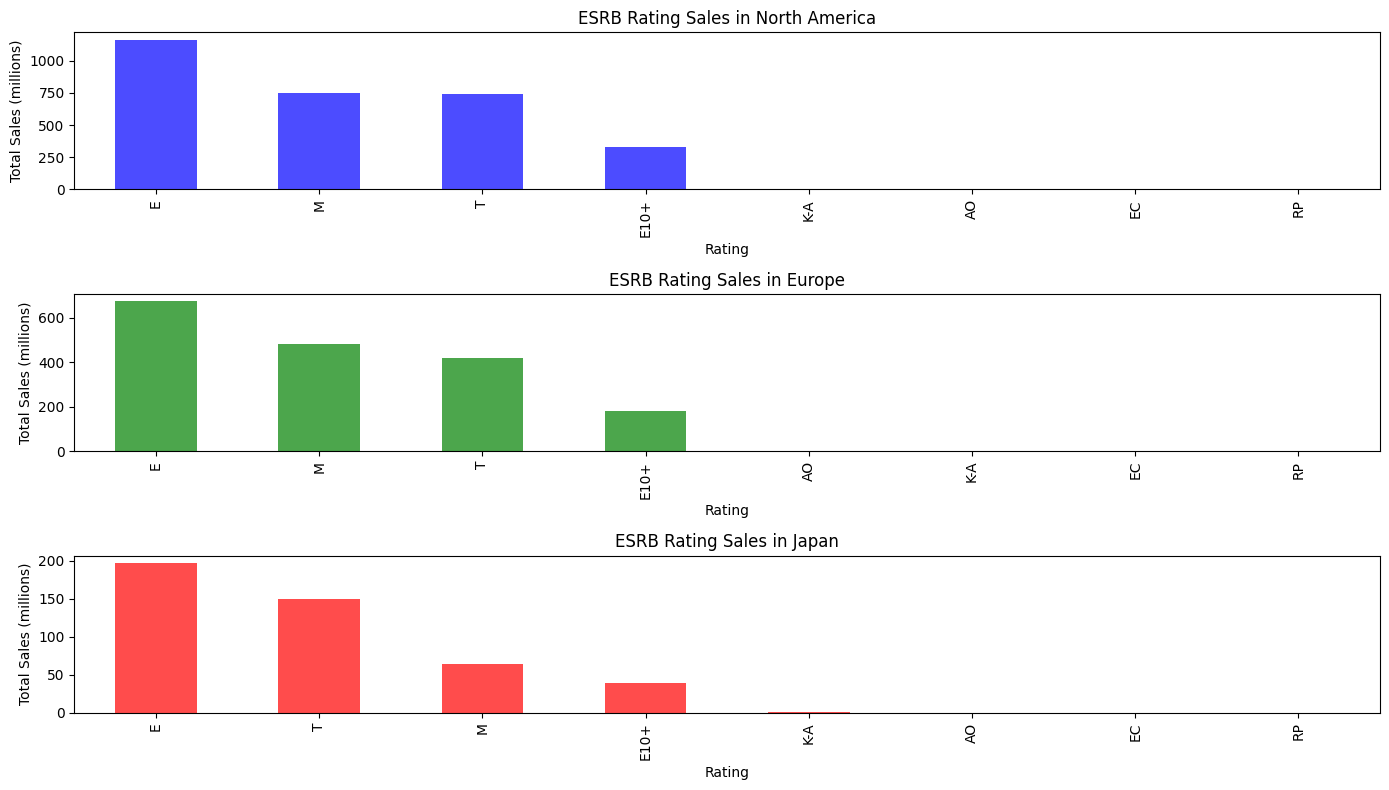

In [15]:
# Calculate sales by ESRB rating for each region
esrb_sales_na = games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Plot sales by ESRB rating for each region
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
esrb_sales_na.plot(kind='bar', color='blue', alpha=0.7)
plt.title('ESRB Rating Sales in North America')
plt.xlabel('Rating')
plt.ylabel('Total Sales (millions)')

plt.subplot(3, 1, 2)
esrb_sales_eu.plot(kind='bar', color='green', alpha=0.7)
plt.title('ESRB Rating Sales in Europe')
plt.xlabel('Rating')
plt.ylabel('Total Sales (millions)')

plt.subplot(3, 1, 3)
esrb_sales_jp.plot(kind='bar', color='red', alpha=0.7)
plt.title('ESRB Rating Sales in Japan')
plt.xlabel('Rating')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

#### Observations
**North America:**
  - 'E' (Everyone) rated games lead in sales, followed by 'T' (Teen) and 'M' (Mature).  
  - Insight: Family-friendly and widely accessible games dominate the market, but mature-rated games also perform well.
  
**Europe:**
  - 'E' rated games also dominate, but 'M' (Mature) sales surpass 'T' (Teen).  
  - Insight: Similar trend to North America, though mature-rated games perform slightly better than teen-rated ones.
  
**Japan:**
  - 'E' rated games are the most successful, followed by 'T' and 'M'.  
  - Insight: Japanese gamers prefer games that appeal to a broad audience, and the market has fewer sales for mature-rated games.

### Summary of User Profiles by Region
#### **Platform Preferences:**
- **North America & Europe:** Favor home consoles like Xbox and PlayStation.
- **Japan:** Prefers handheld and PlayStation platforms.

#### **Genre Popularity:**
- **North America & Europe:** Action, Shooter, and Sports games dominate.
- **Japan:** Strong preference for Role-Playing and Action games.

#### **ESRB Ratings Influence:**
- **North America & Europe:** 'E' (Everyone) and 'M' (Mature) rated games perform best.
- **Japan:** Strong preference for 'E' and 'T' (Teen) rated games.

#### **Overall Insights:**
- Game marketing should be region-specific.
- Family-friendly games have universal appeal, while mature games perform best in Western markets.  
- Platform and genre choices should align with regional user preferences for optimal sales.

***
## Hypothesis Testing
#### Hypothesis 1: Average User Ratings of the Xbox One and PC Platforms are the Same

Formulate Hypotheses:

- Null Hypothesis (H0): The average user ratings of Xbox One and PC platforms are equal.
- Alternative Hypothesis (H1): The average user ratings of Xbox One and PC platforms are not equal.

Significance Level:

- Alpha (α): 0.05, (meaning there is a 5% risk of rejecting the null hypothesis when it is true.)

Conduct the Test:

- Used a two-sample t-test to compare the means of user ratings between Xbox One and PC platforms.

#### Hypothesis 2: Average User Ratings for Action and Sports Genres are Different

Formulate Hypotheses:

- Null Hypothesis (H0): The average user ratings for Action and Sports genres are equal.
- Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.

Choose Significance Level:

- Alpha (α): 0.05 for consistency with the first test.

Conduct the Test:

- Used a two-sample t-test to compare the means of user ratings between Action and Sports genres.

### Hypothesis Testing for Xbox One and PC User Ratings:

In [16]:
# Extract user ratings for Xbox one and PC platforms
xbox_one_ratings = recent_games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = recent_games_df[games_df['platform'] == 'PC']['user_score'].dropna()

# Perform two sample t-test
t_statistic_1, p_value_1 = stats.ttest_ind(xbox_one_ratings, pc_ratings)

# Print the results
print(f'Test 1 - Xbox One vs PC User Ratings:')
print(f'T-statistic: {t_statistic_1:.2f}, P-value: {p_value_1:.4f}')
print('Reject null hypothesis' if p_value_1 < 0.05 else 'Fail to reject null hypothesis')


Test 1 - Xbox One vs PC User Ratings:
T-statistic: 0.59, P-value: 0.5535
Fail to reject null hypothesis


/tmp/ipykernel_147/1929767772.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbox_one_ratings = recent_games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
/tmp/ipykernel_147/1929767772.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc_ratings = recent_games_df[games_df['platform'] == 'PC']['user_score'].dropna()


### Hypothesis Testing for Action and Sports Genres:

In [17]:
# Filter the data for action and sports genres
action_ratings = recent_games_df[games_df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = recent_games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

# Perform two sample t-test
t_statistic_2, p_value_2 = stats.ttest_ind(action_ratings, sports_ratings)

# Print the results
print(f'Test 2 - Action vs Sports User Ratings:')
print(f'T-statistic: {t_statistic_2:.2f}, P-value: {p_value_2:.4f}')
print('Reject null hypothesis' if p_value_2 < 0.05 else 'Fail to reject null hypothesis')

Test 2 - Action vs Sports User Ratings:
T-statistic: 11.01, P-value: 0.0000
Reject null hypothesis


/tmp/ipykernel_147/3973144130.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  action_ratings = recent_games_df[games_df['genre'] == 'Action']['user_score'].dropna()
/tmp/ipykernel_147/3973144130.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sports_ratings = recent_games_df[games_df['genre'] == 'Sports']['user_score'].dropna()


### Results of The Hypothesis Tests:
#### **Hypothesis 1: Average User Ratings of Xbox One and PC Are the Same**
- **Null Hypothesis (H₀):** The average user ratings of Xbox One and PC platforms are equal.
- **Alternative Hypothesis (H₁):** The average user ratings of Xbox One and PC platforms are different.
- **Test Result:** **Fail to reject the null hypothesis** (T-statistic: 0.59, P-value: 0.5535).
- **Interpretation:** The test results indicate that there is **no sufficient statistical evidence** to conclude that the average user ratings for Xbox One and PC platforms are different at the 0.05 significance level. However, this **does not prove** that the ratings are exactly the same—only that the data does not provide strong enough evidence to support a difference.

#### **Hypothesis 2: Average User Ratings for Action and Sports Genres Are Different**
- **Null Hypothesis (H₀):** The average user ratings for Action and Sports genres are equal.
- **Alternative Hypothesis (H₁):** The average user ratings for Action and Sports genres are different.
- **Test Result:** **Reject the null hypothesis** (T-statistic: 11.01, P-value: <0.0001).
- **Interpretation:** There is **strong statistical evidence** to suggest that the average user ratings for Action and Sports genres **are significantly different**. However, rejecting the null hypothesis **does not confirm that all action games have higher or lower ratings than sports games**—it only indicates that the observed difference in ratings is unlikely to be due to random variation.

***
## Overall Conclusion:
**7.1 Sales Performance by Platform**
- Platforms like **PS4, Xbox One, and 3DS** have had high total sales in recent years.
- Newer platforms (PS4, Xbox One, Switch) have shown significant sales growth, peaking within a few years, while older platforms (PS3, X360, Wii) have experienced a decline.
- The Nintendo Switch is an emerging top performer and should be included in future analyses.

**7.2 Genre Popularity**
- Action, Shooter, and Sports are the most profitable genres.
- Shooter games have the highest median and average sales, making them the most consistently high-performing genre.
- Role-Playing games (RPGs) are more dominant in Japan** but less so in other regions.

**7.3 Regional Market Dynamics**
- **North America & Europe:** Favor home consoles like Xbox and PlayStation, with strong sales in Action, Shooter, and Sports** genres.
- **Japan:** Prefers handheld consoles (Nintendo 3DS, Switch) and Role-Playing and Action genres.
- **ESRB Ratings Impact:**  
  - 'E' (Everyone) rated games perform best across all regions.
  - 'M' (Mature) games sell well in North America and Europe but less so in Japan.
  
---

### **Hypothesis Testing Results**
**Hypothesis 1: Xbox One vs. PC User Ratings**
- **Null Hypothesis (H₀):** The average user ratings of Xbox One and PC platforms are equal.
- **Alternative Hypothesis (H₁):** The average user ratings of Xbox One and PC platforms are different.
- **Test Result:** **Fail to reject the null hypothesis** (T-statistic: 0.59, P-value: 0.5535).
- **Conclusion:** There is no statistically significant difference in the average user ratings between Xbox One and PC platforms.

**Hypothesis 2: Action vs. Sports Genre User Ratings**
- **Null Hypothesis (H₀):** The average user ratings for Action and Sports genres are equal.
- **Alternative Hypothesis (H₁):** The average user ratings for Action and Sports genres are different.
- **Test Result:** **Reject the null hypothesis** (T-statistic: 11.01, P-value: <0.0001).
- **Conclusion:** There is a statistically significant difference between the average user ratings for Action and Sports genres.

---

### **Recommendations**
**Focus on Leading Platforms**
- **Prioritize development and marketing** for **PS4, Xbox One, and Nintendo Switch** as they have **strong sales and market growth**.
- **Nintendo 3DS is still relevant in Japan** but has declined elsewhere.

**Invest in Quality**
- **Higher critic reviews strongly correlate with higher sales**—ensuring high-quality development will increase profitability.
- **User scores have a weaker correlation** but still impact reputation.

**Target Profitable Genres**
- **Action, Shooter, and Sports** genres generate the most revenue.
- **RPGs should be prioritized for Japan**, as they perform better in this market.

**Monitor Market Trends**
- **Adapt strategies** for emerging platforms like Nintendo Switch and upcoming next-gen consoles.
- **Stay competitive** by analyzing yearly genre and platform performance shifts.

#### **Regional Strategies**
**North America (NA)**
- **Key Genres:** Action, Shooter, Sports  
- **Key Platforms:** PS4, Xbox One, Nintendo Switch  
- **Insight:** Gamers prefer high-performance home consoles with multiplayer and sports games.

**Europe (EU)**
- **Key Genres:** Action, Sports, Shooter  
- **Key Platforms:** PS4, Xbox One, Nintendo Switch  
- **Insight:** Market is similar to NA, but sports games have a stronger presence.

**Japan (JP)**
- **Key Genres:** Role-Playing, Action, Platformers  
- **Key Platforms:** Nintendo 3DS, PS4, Nintendo Switch  
- **Insight:** Handheld and PlayStation consoles dominate due to cultural preferences.

#### **Promising Platforms and Genres**
- **Promising Platforms:** PS4, Xbox One, Nintendo Switch  
- **Profitable Genres:** Action, Shooter, Sports  
- **ESRB Ratings Impact:** Family-friendly ('E') rated games perform well across all regions.
***